We will be analyzing the famous iris data set!

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Here's a picture of the three different Iris types:

In [2]:
# The Iris Setosa
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width=300, height=300)

FileNotFoundError: No such file or directory: 'None'

FileNotFoundError: No such file or directory: 'None'

<IPython.core.display.Image object>

In [3]:
# The Iris Versicolor
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'
Image(url,width=300, height=300)

FileNotFoundError: No such file or directory: 'None'

FileNotFoundError: No such file or directory: 'None'

<IPython.core.display.Image object>

In [4]:
# The Iris Virginica
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
Image(url,width=300, height=300)

FileNotFoundError: No such file or directory: 'None'

FileNotFoundError: No such file or directory: 'None'

<IPython.core.display.Image object>

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
iris = sns.load_dataset('iris')

In [7]:
import pandas as pd
import numpy as np

In [8]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


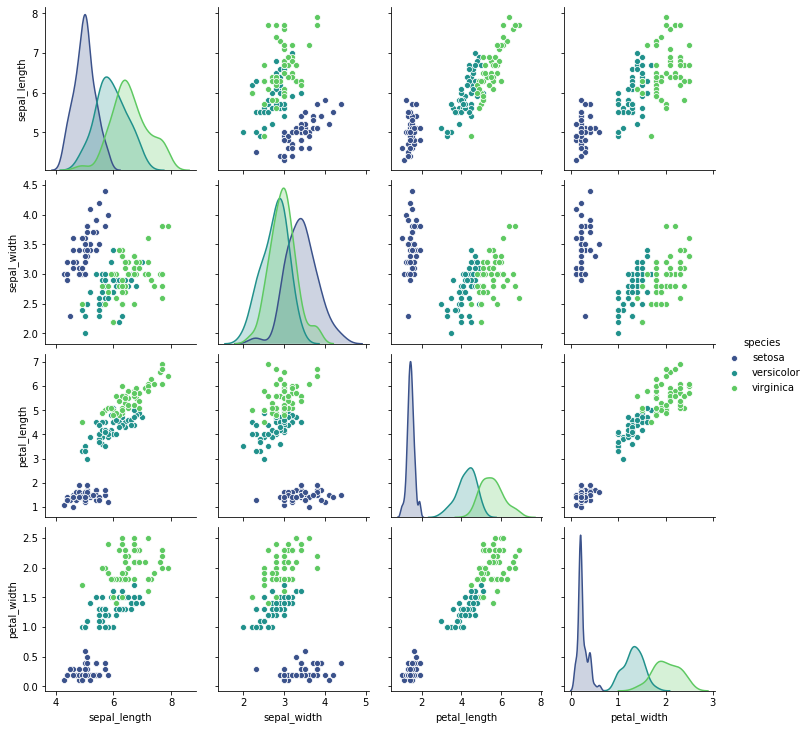

In [9]:
sns.pairplot(data=iris, hue='species', palette='viridis')

In [10]:
#Noticein the plot above, Setosa is the most separable.

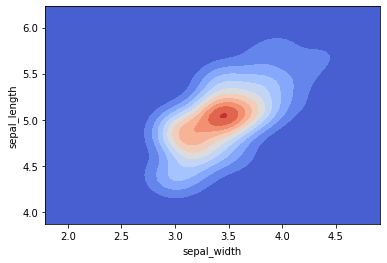

In [11]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(data=setosa['sepal_width'], data2=setosa['sepal_length'], cmap='coolwarm', shade=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC()

In [17]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
predictions = model.predict(X_test)

In [20]:
print(confusion_matrix(y_test,predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [22]:
iris.shape

(150, 5)

The model looks pretty good but let's see if we can tune the parameters to try to get even better because the data set is quite small

## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [24]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [25]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [26]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [27]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [28]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
grid_predictions = grid.predict(X_test)

In [30]:
print(confusion_matrix(y_test,grid_predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [33]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The predctions seem to be the same or exactly the same, so its unlikely there's an overfit which we were trying to reduce.